In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [2]:
variable_list = pd.read_excel("dataset/PAKDD2010_VariablesList.XLS")
variable_list.loc[43,'Var_Title']='MATE_EDUCATION_LEVEL'
columns_names = variable_list['Var_Title'].tolist()
training_df = pd.read_csv('dataset/PAKDD2010_Modeling_Data.txt', 
                            encoding='latin-1',
                            delimiter="\t",
                            header=None,
                            names=columns_names)

train_df, test_df = train_test_split(training_df,
                                        test_size=0.2,
                                        random_state=42,
                                        shuffle=True)



C:\Users\crist\AppData\Local\Temp\ipykernel_22604\3205847832.py:4: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  training_df = pd.read_csv('dataset/PAKDD2010_Modeling_Data.txt',


In [3]:
train_df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
39087,39088,C,5,Web,0,1,F,1,0,0,...,0,0,0,0,1,N,29,288,288,1
30893,30894,C,10,0,0,1,F,2,2,0,...,0,0,0,0,1,N,40,608,608,0
45278,45279,C,15,Web,0,1,F,2,0,0,...,0,0,0,0,2,N,52,454,454,0
16398,16399,C,20,0,0,1,M,2,0,0,...,0,0,0,0,1,N,46,686,686,0
13653,13654,C,25,0,0,1,F,1,0,0,...,0,0,0,0,1,N,40,607,607,0


In [4]:
variable_list

,Var_Id,Var_Title,Var_Description,Field_Content
0,1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
1,2,CLERK_TYPE,Not informed,C
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
5,6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
6,7,SEX,NaN,"M=Male, F=Female"
7,8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
8,9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."
9,10,EDUCATION_LEVEL,Edducational level in gradual order not informed,"1,2,3,4,5"


Total value count:
0    29623
1    10377
Name: TARGET_LABEL_BAD=1, dtype: int64
Total value percentage:
0    74.0575
1    25.9425
Name: TARGET_LABEL_BAD=1, dtype: float64


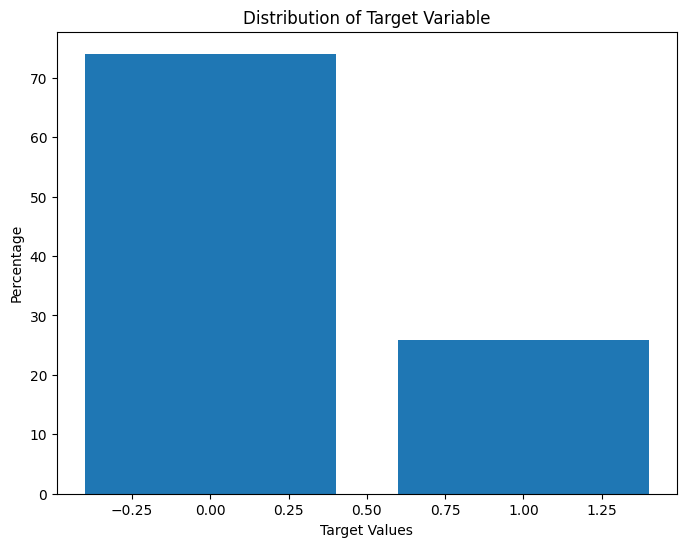

In [7]:
target=train_df['TARGET_LABEL_BAD=1']
tar_counts_val= target.value_counts()
tar_counts_per = target.value_counts(normalize=True) * 100
print("Total value count:")
print(tar_counts_val)
print("Total value percentage:")
print(tar_counts_per)

plt.figure(figsize=(8,6))
plt.bar(tar_counts_per.index, tar_counts_per.values)
plt.xlabel('Target Values')
plt.ylabel('Percentage')
plt.title('Distribution of Target Variable')
plt.show()

In [6]:
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
for cat_col in categorical_cols:
    unique_values = train_df[cat_col].nunique()
    print("{}: {}".format(cat_col, unique_values))

CLERK_TYPE: 1
APPLICATION_SUBMISSION_TYPE: 3
SEX: 4
STATE_OF_BIRTH: 28
CITY_OF_BIRTH: 8731
RESIDENCIAL_STATE: 27
RESIDENCIAL_CITY: 3209
RESIDENCIAL_BOROUGH: 12579
FLAG_RESIDENCIAL_PHONE: 2
RESIDENCIAL_PHONE_AREA_CODE: 98
FLAG_MOBILE_PHONE: 1
COMPANY: 2
PROFESSIONAL_STATE: 28
PROFESSIONAL_CITY: 2023
PROFESSIONAL_BOROUGH: 4322
FLAG_PROFESSIONAL_PHONE: 2
PROFESSIONAL_PHONE_AREA_CODE: 82
FLAG_ACSP_RECORD: 1
RESIDENCIAL_ZIP_3: 1450
PROFESSIONAL_ZIP_3: 1450


In [8]:
total_missing = train_df.isna().sum()
percent_missing = (total_missing / len(train_df)) * 100
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent Missing'])
missing_data = missing_data[missing_data['Percent Missing']>0].sort_values('Percent Missing', ascending=False)
missing_data

,Total,Percent Missing
PROFESSIONAL_CITY,27015,67.5375
PROFESSIONAL_BOROUGH,27015,67.5375
MATE_EDUCATION_LEVEL,25892,64.7300
MATE_PROFESSION_CODE,23102,57.7550
PROFESSION_CODE,6247,15.6175
OCCUPATION_TYPE,5894,14.7350
MONTHS_IN_RESIDENCE,3022,7.5550
RESIDENCE_TYPE,1108,2.7700


In [11]:
from src import data_ext, data_prep

In [12]:
X_train, y_train, X_test, y_test= data_ext.get_features(train_df, test_df)

In [13]:
X_train, X_val, y_train, y_val = data_ext.get_train_val(X_train, y_train)

In [14]:
train_data, val_data, test_data = data_prep.preprocess_data(X_train, X_val, X_test)

In [23]:
train_data

array([[0.23588472, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.49850997, 0.375     , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57157143, 0.16666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.11552231, 0.375     , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.49728995, 0.375     , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1551231 , 0.375     , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [17]:
%%capture
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.validation import check_is_fitted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from src import config, data_utils, preprocessing

from sklearn.metrics import accuracy_score

import mlflow
from sklearn.metrics import accuracy_score, roc_auc_score

import mlflow
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import mlflow
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import mlflow
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import mlflow
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil

In [42]:
%%capture
# Libraries for Data Manipulation and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import local modules
# from src import config, data_utils, preprocessing

# Libraries for Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.validation import check_is_fitted

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix


import xgboost as xgb
import lightgbm as lgb


import os
import shutil

# Libraries for Experiment Tracking
import mlflow

In [32]:
C= 0.1
max_iter= 1000
random_state= 42

with mlflow.start_run():
    log_reg = LogisticRegression(C=C,
                                max_iter=max_iter,
                                random_state=random_state)

    log_reg.fit(train_data, y_train)

    # log
    mlflow.log_param("C", C)
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("random_state", random_state)


    # Calcular y registrar la métrica de precisión
    train_preds = log_reg.predict(train_data)
    train_accuracy = accuracy_score(y_train, train_preds)
    mlflow.log_metric("train_accuracy", train_accuracy)

    # Registrar el modelo
    mlflow.sklearn.log_model(log_reg, "logistic_regression")

In [34]:
C = 0.1
max_iter = 1000
random_state = 42

# Start an MLflow run to track the experiment
with mlflow.start_run(run_name="LogisticRegression"):
    # Initialize the Logistic Regression model with the specified hyperparameters
    log_reg = LogisticRegression(C=C,
                                  max_iter=max_iter,
                                  random_state=random_state)

    # Train the model on the training data
    log_reg.fit(train_data, y_train)

    # Log the model's hyperparameters using mlflow.log_param()
    mlflow.log_param("Model", "LogisticRegression")
    mlflow.log_param("C", C)
    mlflow.log_param("max_iter", max_iter)
    mlflow.log_param("random_state", random_state)

    # Calculate and log the accuracy metric on the training data using mlflow.log_metric()
    train_preds = log_reg.predict(train_data)
    train_accuracy = accuracy_score(y_train, train_preds)
    mlflow.log_metric("train_accuracy", train_accuracy)

    # Calculate and log the ROC AUC metric on the training data using mlflow.log_metric()
    train_probs = log_reg.predict_proba(train_data)[:, 1]
    train_roc_auc = roc_auc_score(y_train, train_probs)
    mlflow.log_metric("train_roc_auc", train_roc_auc)

    # Log the trained model itself using mlflow.sklearn.log_model()
    mlflow.sklearn.log_model(log_reg, "logistic_regression")

In [35]:
def train_and_log_model(train_data, y_train, val_data, y_val, n_estimators, max_depth, random_state, run_name="Baseline"):
    # Start an MLflow run with the specified run_name
    with mlflow.start_run(run_name=run_name):
        # Initialize and train the Random Forest Classifier with the given hyperparameters
        rf_clf = RandomForestClassifier(n_estimators=n_estimators,
                                        max_depth=max_depth,
                                        random_state=random_state)
        rf_clf.fit(train_data, y_train)

        # Log the model's hyperparameters
        mlflow.log_param("Model", run_name)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("random_state", random_state)

        # Calculate and log the accuracy metric for the training dataset
        train_preds = rf_clf.predict(train_data)
        train_accuracy = accuracy_score(y_train, train_preds)
        mlflow.log_metric("train_accuracy", train_accuracy)

        # Calculate and log the ROC AUC metric for the training dataset
        train_probs = rf_clf.predict_proba(train_data)[:, 1]
        train_roc_auc = roc_auc_score(y_train, train_probs)
        mlflow.log_metric("train_roc_auc", train_roc_auc)

        # Log the trained model using mlflow.sklearn.log_model()
        mlflow.sklearn.log_model(rf_clf, "random_forest_classifier")

        # Calculate and log the ROC AUC metric for the validation dataset
        val_probs = rf_clf.predict_proba(val_data)[:, 1]
        val_roc_auc = roc_auc_score(y_val, val_probs)
        mlflow.log_metric("val_roc_auc", val_roc_auc)

        # Print the ROC AUC score for the validation dataset
        print(f"ROC AUC en el conjunto de validación: {val_roc_auc:.4f}")

In [36]:
train_and_log_model(train_data, y_train, val_data, y_val, n_estimators=60, max_depth=5, random_state=42, run_name="RandomForestClassifier")

ROC AUC en el conjunto de validación: 0.6096


In [37]:
list_max_depth_case = [1,2,3,4,5,6,7]

for i in list_max_depth_case:
    train_and_log_model(train_data, y_train, val_data, y_val, n_estimators=100, max_depth= i, random_state=42, run_name="RandomForestClassifier")

ROC AUC en el conjunto de validación: 0.5897
ROC AUC en el conjunto de validación: 0.5947
ROC AUC en el conjunto de validación: 0.5995
ROC AUC en el conjunto de validación: 0.6064
ROC AUC en el conjunto de validación: 0.6098
ROC AUC en el conjunto de validación: 0.6120
ROC AUC en el conjunto de validación: 0.6149


In [38]:
def train_and_log_model(train_data, y_train, val_data, y_val, n_iter, cv, random_state,
                        n_estimators_range, max_depth_range, min_samples_split_values,
                        min_samples_leaf_values, bootstrap_values, run_name="RandomizedSearchCV"):
    
    param_grid = {
        "n_estimators": n_estimators_range,
        "max_depth": max_depth_range,
        "min_samples_split": min_samples_split_values,
        "min_samples_leaf": min_samples_leaf_values,
        "bootstrap": bootstrap_values,
    }

    rf_random = RandomizedSearchCV(
        estimator=RandomForestClassifier(),
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        verbose=2,
        random_state=random_state,
    )

    with mlflow.start_run(run_name=run_name):
        rf_random.fit(train_data, y_train)

        best_params = rf_random.best_params_
        best_rf_clf = rf_random.best_estimator_

        # Log parameters
        mlflow.log_param("Model", run_name)
        for param, value in best_params.items():
            mlflow.log_param(param, value)

        # Calcular y registrar la métrica de precisión
        train_preds = best_rf_clf.predict(train_data)
        train_accuracy = accuracy_score(y_train, train_preds)
        mlflow.log_metric("train_accuracy", train_accuracy)

        # Calcular y registrar el ROC AUC para el conjunto de entrenamiento
        train_probs = best_rf_clf.predict_proba(train_data)[:, 1]
        train_roc_auc = roc_auc_score(y_train, train_probs)
        mlflow.log_metric("train_roc_auc", train_roc_auc)

        # Registrar el modelo
        mlflow.sklearn.log_model(best_rf_clf, "random_forest_classifier")

        # Calcular y registrar el ROC AUC para el conjunto de validación
        val_probs = best_rf_clf.predict_proba(val_data)[:, 1]
        val_roc_auc = roc_auc_score(y_val, val_probs)
        mlflow.log_metric("val_roc_auc", val_roc_auc)


In [ ]:
# Ejemplo de uso de la función
n_estimators_range = [int(x) for x in np.linspace(start=200, stop=2000, num=50)]
max_depth_range = [int(x) for x in np.linspace(10, 50, num=5)]
min_samples_split_values = [2, 5]
min_samples_leaf_values = [1, 2]
bootstrap_values = [True]

train_and_log_model(train_data, y_train, val_data, y_val, n_iter=2, cv=2, random_state=42,
                    n_estimators_range=n_estimators_range, max_depth_range=max_depth_range,
                    min_samples_split_values=min_samples_split_values, min_samples_leaf_values=min_samples_leaf_values,
                    bootstrap_values=bootstrap_values)

In [40]:
def train_and_log_lightgbm(train_data, y_train, val_data, y_val, params, run_name="LightGBM"):
    
    with mlflow.start_run(run_name=run_name):

        # Crear el conjunto de datos de LightGBM
        lgb_train_data = lgb.Dataset(train_data, label=y_train)
        lgb_val_data = lgb.Dataset(val_data, label=y_val, reference=lgb_train_data)

        mlflow.log_param("Model", run_name)

        # Entrenar el modelo LightGBM
        lgb_model = lgb.train(params, lgb_train_data, valid_sets=lgb_val_data)

        # Log parameters
        for param, value in params.items():
            mlflow.log_param(param, value)

        # Calcular y registrar la métrica de precisión en el conjunto de entrenamiento
        train_preds = np.round(lgb_model.predict(train_data))
        train_accuracy = accuracy_score(y_train, train_preds)
        mlflow.log_metric("train_accuracy", train_accuracy)

        # Calcular y registrar el ROC AUC para el conjunto de entrenamiento
        train_probs = lgb_model.predict(train_data)
        train_roc_auc = roc_auc_score(y_train, train_probs)
        mlflow.log_metric("train_roc_auc", train_roc_auc)

        # Calcular y registrar la métrica de precisión en el conjunto de validación
        val_preds = np.round(lgb_model.predict(val_data))
        val_accuracy = accuracy_score(y_val, val_preds)
        mlflow.log_metric("val_accuracy", val_accuracy)

        # Calcular y registrar el ROC AUC para el conjunto de validación
        val_probs = lgb_model.predict(val_data)
        val_roc_auc = roc_auc_score(y_val, val_probs)
        mlflow.log_metric("val_roc_auc", val_roc_auc)

        # Registrar el modelo
        mlflow.lightgbm.log_model(lgb_model, "lightgbm")

        print(f"ROC AUC en el conjunto de validación: {val_roc_auc:.4f}")

In [47]:
%%capture
params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
}

train_and_log_lightgbm(train_data, y_train, val_data, y_val, params)

In [48]:
def train_and_log_xgboost(train_data, y_train, val_data, y_val, params, run_name="XGBoost", artifact_path="artifact"):
    
    with mlflow.start_run(run_name=run_name):

        # Crear el conjunto de datos de XGBoost
        xgb_train_data = xgb.DMatrix(train_data, label=y_train)
        xgb_val_data = xgb.DMatrix(val_data, label=y_val)

        # Entrenar el modelo XGBoost
        xgb_model = xgb.train(params, xgb_train_data, evals=[(xgb_val_data, 'validation')])

        # Log parameters
        for param, value in params.items():
            mlflow.log_param(param, value)

        # Registrar el nombre del modelo
        mlflow.log_param("Model", run_name)

        # Calcular y registrar la métrica de precisión en el conjunto de entrenamiento
        train_preds = np.round(xgb_model.predict(xgb_train_data))
        train_accuracy = accuracy_score(y_train, train_preds)
        mlflow.log_metric("train_accuracy", train_accuracy)

        # Calcular y registrar el ROC AUC para el conjunto de entrenamiento
        train_probs = xgb_model.predict(xgb_train_data)
        train_roc_auc = roc_auc_score(y_train, train_probs)
        mlflow.log_metric("train_roc_auc", train_roc_auc)

        # Calcular y registrar la métrica de precisión en el conjunto de validación
        val_preds = np.round(xgb_model.predict(xgb_val_data))
        val_accuracy = accuracy_score(y_val, val_preds)
        mlflow.log_metric("val_accuracy", val_accuracy)

        # Calcular y registrar el ROC AUC para el conjunto de validación
        val_probs = xgb_model.predict(xgb_val_data)
        val_roc_auc = roc_auc_score(y_val, val_probs)
        mlflow.log_metric("val_roc_auc", val_roc_auc)

        # Registrar el modelo
        mlflow.xgboost.log_model(xgb_model, "xgboost")

        # Guardar artefacto
        os.makedirs(artifact_path, exist_ok=True)
        
        # Crear y guardar la matriz de confusión como imagen
        cm = confusion_matrix(y_val, val_preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        plt.title("Matriz de confusión")
        confusion_matrix_path = os.path.join(artifact_path, "confusion_matrix.png")
        plt.savefig(confusion_matrix_path)
        plt.close()

        mlflow.log_artifacts(artifact_path)

        # Eliminar el directorio del artefacto local después de registrar
        shutil.rmtree(artifact_path)

        print(f"ROC AUC en el conjunto de validación: {val_roc_auc:.4f}")

In [51]:
%%capture
# Ejemplo de uso de la función
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "max_depth": 10,
    "eta": 0.3,
    "silent": 1,
}

train_and_log_xgboost(train_data, y_train, val_data, y_val, params)

In [53]:
max_deep = [17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
for deep in max_deep:
    params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "max_depth": deep,
        "eta": 0.3,
        "silent": 1,
    }
    train_and_log_xgboost(train_data, y_train, val_data, y_val, params, run_name=f"XGBoost_{deep}")

[19:38:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-auc:0.56813
[1]	validation-auc:0.56627
[2]	validation-auc:0.56537
[3]	validation-auc:0.56547
[4]	validation-auc:0.56833
[5]	validation-auc:0.57189
[6]	validation-auc:0.57210
[7]	validation-auc:0.57235
[8]	validation-auc:0.57186
[9]	validation-auc:0.57276
ROC AUC en el conjunto de validación: 0.5728
[19:38:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-auc:0.56692
[1]	validation-auc:0.57478
[2]	validation-auc:0.57402
[3]	validation-auc:0.57560
[4]	validation-auc:0.57818
[5]	validation-auc:0.58124
[6]	validation-auc:0.58370
[7]	validation-auc:0.58314
[8]	validation-auc:0.58227
[9]	validation-auc:0.58154
ROC AUC en el conjunto 